In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("titanic.csv", usecols=["Fare", "Age", "Survived"])

In [4]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [6]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [7]:
df["Age_imputed"] = df["Age"]

In [8]:
df.head()

,Survived,Age,Fare,Age_imputed
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [9]:
x = df.drop(columns=["Survived"])
y = df["Survived"]

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=None)

In [13]:
x_train.head()

,Age,Fare,Age_imputed
402,21.0,9.825,21.0
612,NaN,15.500,NaN
220,16.0,8.050,16.0
406,51.0,7.750,51.0
12,20.0,8.050,20.0


In [28]:
x_train["Age_imputed"][x_train["Age_imputed"].isnull()] = x_train["Age_imputed"].dropna().sample(x_train["Age_imputed"].isnull().sum()).values
x_test["Age_imputed"][x_test["Age_imputed"].isnull()] = x_test["Age_imputed"].dropna().sample(x_test["Age_imputed"].isnull().sum()).values

/tmp/ipykernel_9277/2864782918.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  x_test["Age_imputed"][x_test["Age_imputed"].isnull()] = x_test["Age_imputed"].dropna().sample(x_test["Age_imputed"].isnull().sum()).values


In [45]:
x_train["Age_imputed"].isnull().sum()

0

In [46]:

x_test["Age_imputed"].isnull().sum()

0

## Now lets check the difference in the graph:

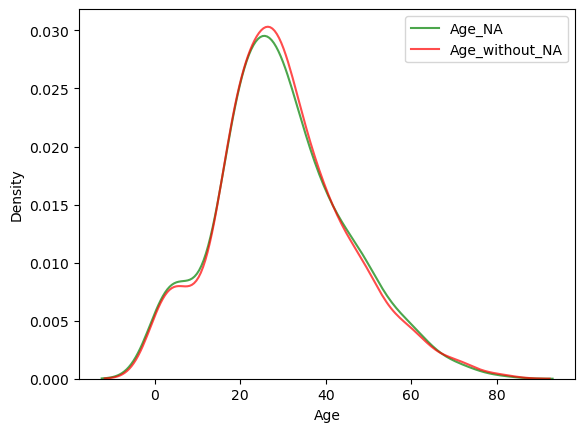

In [49]:
sns.kdeplot(x_train["Age"], color="green", label= "Age_NA" , alpha = 0.7)
sns.kdeplot(x_train["Age_imputed"], color="red", label= "Age_without_NA", alpha = 0.7)
plt.legend()
plt.show()

## now check the varience between the age and age_imputed:

In [54]:
print("Before impution: ",x_train["Age"].var())
print("After impution: ", x_train["Age_imputed"].var())

Before impution:  226.41700358485227
After impution:  222.94840207170978


In [65]:
x_train[["Age", "Fare"]].cov()

,Age,Fare
Age,226.417004,58.662828
Fare,58.662828,2334.254093


In [67]:
x_train[["Age_imputed", "Fare"]].cov()

,Age_imputed,Fare
Age_imputed,222.948402,53.426944
Fare,53.426944,2334.254093
